# COMP-4360 Machine Learning - Assignment

## Instructions

| Date set     | Hand-in date |
|------------------|-----------------------------------|
|23rd February 2021  | **29th March 2021** |



Candidate number: 7863183

Your report should consist of your Jupyter notebook showing what you did (including technical descriptions of the implemented algorithms), what was the result and what you can conclude from the experiments. Each report will be
assessed on the following criteria:

* Does it record what was done including the details of the implemented algorithms?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

Use markdown to explain what you are doing (including detailed equations for models and algorithms), what the results mean, how they relate to the theory, etc. For learning features of jupyter notebooks, you might refer to this guide: https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook

Do not delete this preamble.

### Submitting the notebooks

Only an electronic submissions is required.  Submit your notebook (the .ipynb file) via e-mail to [lorenzo.livi@umanitoba.ca](mailto:lorenzo.livi@umanitoba.ca).
You should be able to upload the notebook directly from wherever it is on your machine. If you are not sure where it is, type <code>pwd</code> (print working directory) in a cell to find out. To keep the marking anonymous, please do not leave directory names that reveal your identity in cells.

<div class="alert alert-warning">
Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 

## Project specification

The assignment consists of two parts, each one worth 50% of the total weight associated with the assignment.

- **First part of the project**

Implement the k-means algorithm using the Mahalanobis distance instead of the standard Euclidean distance. Then, create a toy dataset with 2 or 3 dimensions (so it is possible to easily visualize the data) with roughly 500 data points. Such a dataset should be designed so that it allows you to show how and when k-means operating with the Mahalanobis distance works better than k-means equipped with the Euclidean distance and a centroid-based cluster representative.
    
- **Second part of the project**

Implement the Davies-Bouldin index for cluster validation (intrinsic cluster validation). Then, perform model selection for finding the best partition order *k* of k-means. For this part of the project, use the standard k-means implementation operating with the Euclidean distance and centroids as cluster representatives. Perform simulations and comments on the results obtained on the dataset named "cluster_validation_data.txt" that has been provided with this notebook.

## Your project starts from here

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

### Part 1 of the project...

We first must create our data. In this case we will use numpy's built-in multivariate_normal() function to create our multiple "clusters", and then we will mix these clusters together into a general dataset for our later steps to analyze and find information on. 

Note that while I am manually inputting mean and covariance data (hence, it is already known) I will still be manually calculating all information on the generated data set when needed, as if these values were unknown.

In [2]:
#cluster 1
mean1 = [0,0]
cov1 = [[.5,0], [0,.5]]

x1, y1 = random.multivariate_normal(mean1, cov1, 150).T 

#cluster 2
mean2 = [7,2]
cov2 = [[2,1], [1,.6]]

x2, y2 = random.multivariate_normal(mean2, cov2, 150).T

#cluster 3
mean3 = [3,7]
cov3 = [[1,1], [1,1.5]]

x3, y3 = random.multivariate_normal(mean3, cov3, 150).T

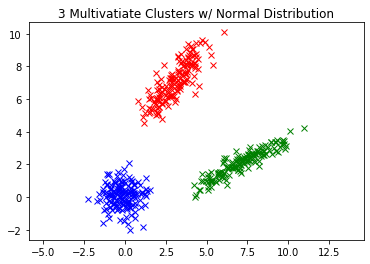

In [3]:
#This is our generated data with given multivariate clusters

plt.plot(x1 ,y1 , 'bx')
plt.plot(x2 ,y2 , 'gx')
plt.plot(x3 ,y3 , 'rx')

plt.axis('equal')
plt.title('3 Multivatiate Clusters w/ Normal Distribution')
plt.show() 

In [4]:
#We then append all of this data into a single data matrix, with randomized order.
X = []
X = np.append(X, x1, axis=0)
X = np.append(X, x2, axis=0)
X = np.append(X, x3, axis=0)

Y = []
Y = np.append(Y, y1, axis=0)
Y = np.append(Y, y2, axis=0)
Y = np.append(Y, y3, axis=0)

d = np.zeros((450,2))
for i in range(len(d)):
    d[i] = [X[i], Y[i]]
    #d = np.append(d, [X[i], Y[i]], axis=0)
#d = np.vstack((X, Y)).T
#d = random.shuffle(d)
np.random.shuffle(d)


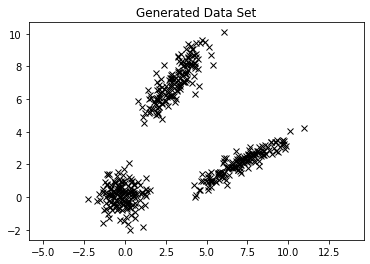

In [5]:
#This is our generated data with given multivariate clusters, 
#all formatted into a single shuffled data matrix

plt.plot(X, Y, 'kx')

plt.axis('equal')
plt.title('Generated Data Set')
plt.show() 

In [114]:
#From here we are acting on the data D as if it was simply given to us as-is.

MAX_ITERATIONS = 1000

In [7]:
#Our general euclidean R^2 disimilarity metric

def dist_e(p1:np.array, p2:np.array):
    newP = np.subtract(p1,p2)
    dist = np.sqrt(newP[0]*newP[0] + newP[1]*newP[1])
    return dist

In [8]:
#Our Mahalanobis R^2 disimilarity metric

def dist_m(p1:np.array, p2:np.array, covar:np.array):
    p = np.subtract(p1,p2)
    inv = invert2x2(covar)

    dist = np.sqrt(p[0]*(p[0]*inv[0][0] + p[1]*inv[0][1]) + p[1]*(p[0]*inv[1][0] + p[1]*inv[1][1]))
    #dist = p[0]*(p[0]*inv[0][0] + p[1]*inv[0][1]) + p[1]*(p[0]*inv[1][0] + p[1]*inv[1][1])

    return dist

In [9]:
def calculateMeans(data:np.array, partition:np.array):

    means = np.zeros((len(partition),2))

    for i in range(len(partition)):
        repSum = [0,0]
        counter = 0
        for j in range(len(data)):
            if partition[i][j] > 0:
                repSum[0] = repSum[0] + data[j][0]
                repSum[1] = repSum[1] + data[j][1]
                counter = counter + 1
        if counter > 0:
            repSum[0] = repSum[0]/counter
            repSum[1] = repSum[1]/counter
            means[i] = repSum
            
    return means

In [59]:
#We can now plot out
def plot_partition(data:np.array, partition:np.array, name):
    #A matrix to specify plotting color and style
    col = ['rx','gx','bx','cx','mx','yx']

    for i in range(len(data)):
        for j in range(len(partition)):
            if partition[j][i] > 0:
                plt.plot(data[i][0], data[i][1], col[j])

    plt.axis('equal')
    plt.title(name)
    plt.show() 

In [83]:
#The K-Means Algorithm: (Euclidean Metric)

def kmean_e(Data:np.array, clusterNum:int):
    t = 0
    partition = np.zeros((clusterNum, len(Data)))#Initalize empty partition
    
    means = random.rand(clusterNum, 2)
        
    while(t < MAX_ITERATIONS): #add in the partition equality check
        newPartition = np.zeros((clusterNum, len(Data)))
        for j in range(len(Data)):
            #Iterating over all data, find the closest representitive
            closestIndex = 0
            closestDist = 10000
            for i in range(len(means)):
                dist = dist_e(means[i], Data[j])
                if dist < closestDist:
                    closestDist = dist
                    closestIndex = i
            #we now have the closest one, assign it.  
            newPartition[closestIndex][j] = 1
                
        means = calculateMeans(Data, newPartition)
        #if partition == newPartition:
        #    return newPartition
        
        partition = newPartition
        t = t + 1
        
    return partition

    

In [84]:
#The K-Means Algorithm: (Mahalanobis Metric)

def kmean_m(Data:np.array, clusterNum:int):
    t = 0
    partition = np.zeros((clusterNum, len(Data)))#Initalize empty partition
    
    means = random.rand(clusterNum, 2)

    #initalize covariances to the identity
    covars = np.zeros((clusterNum, 2, 2))
    for i in range(clusterNum):
        covars[i] = [[1,0],[0,1]]
    
    while(t < MAX_ITERATIONS): #add in the partition equality check again
        newPartition = np.zeros((clusterNum, len(Data)))
        for j in range(len(Data)):
            #Iterating over all data, find the closest representitive
            closestIndex = 0
            closestDist = 10000
            for i in range(len(means)):
                dist = dist_m(means[i], Data[j], covars[i])
                if dist < closestDist:
                    closestDist = dist
                    closestIndex = i
            #we now have the closest one, assign it.  
            newPartition[closestIndex][j] = 1
            
        #Now, after we have assigned everything we can move onto re-evaluating out means.
        means = calculateMeans(Data, newPartition)

        #recalculate covariances:
        for i in range(clusterNum):
            fillingCluster = np.zeros((450,2))
            num = 0
            for j in range(len(Data)):
                if newPartition[i][j] > 0:
                    fillingCluster[num] = Data[j]
                    num = num + 1
                    
            #This is an odd workaround for issues numpy.appending 2D vector arrays
            realCluster = np.zeros((num, 2))
            for k in range(num-1):
                realCluster[k] = fillingCluster[k]
                
            if len(realCluster) > 1:
                covars[i] = calculateCovar(realCluster, means[i])
        
        partition = newPartition
        t = t + 1
        
        #print(covars)
        
    return partition


In [85]:
#Calculates the covariance of a list of 2-dimentional data
def calculateCovar(data:np.array, mean:np.array):
    covar = np.zeros((2, 2))
    #First we do the diagonals in the classic way:
    dataNum = len(data)
    sum = 0
    #Top Left
    for i in range(len(data)):
        e = data[i][0] - mean[0]
        e = e*e
        sum = sum + e
    sum = sum/(dataNum-1)
    covar[0][0] = sum
    
    #Bottom Right
    sum = 0
    for i in range(len(data)):
        e = data[i][1] - mean[1]
        e = e*e
        sum = sum + e
    sum = sum/(dataNum-1)
    covar[1][1] = sum
    
    #The off-diagonal
    sum = 0
    for i in range(len(data)):
        e = (data[i][1] - mean[1])*(data[i][0] - mean[0])
        sum = sum + e
    sum = sum/(dataNum-1)
    covar[0][1] = sum
    covar[1][0] = sum
    
    return covar

In [86]:
#Inverts a 2x2 matrix
def invert2x2(data:np.array):
    scalar = 1/((data[0][0]*data[1][1])-(data[1][0]*data[0][1]))
    result = [[scalar*data[0][0], -scalar*data[0][1]],[scalar*-data[1][0], scalar*data[1][1]]]
    return result

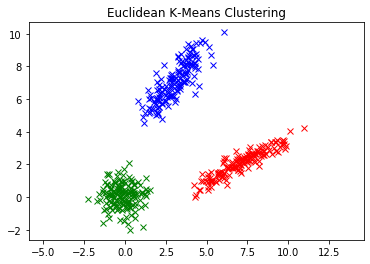

In [87]:
#Evaluating the k_means function with the euclidean metric
result_e = kmean_e(d, 3)
plot_partition(d, result_e, 'Euclidean K-Means Clustering')

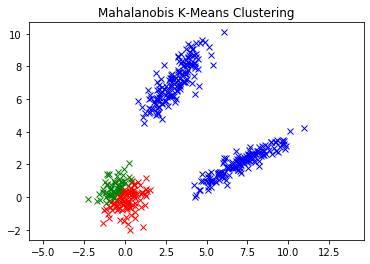

In [88]:
result_m = kmean_m(d, 3)
plot_partition(d,result_m, 'Mahalanobis K-Means Clustering')

### Part 2 of the project...

In [106]:
#returns a matrix of Davies-Bouldin values 

def db_matrix(data:np.array, partition:np.array):
    
    clusterNum = len(partition)
    dataNum = len(data)
    
    #initalize the matrix holding DB values.
    dbmatrix = np.zeros((clusterNum, clusterNum))
    
    #Calculate means of each cluster
    means = calculateMeans(data,partition)
    
    distMeans = np.zeros(clusterNum)
    #calculate average distance to cluster mean into distMeans
    for i in range(clusterNum):
        total = 0
        counter = 0
        for j in range(dataNum):
            if partition[i][j] > 0:
                total = total + dist_e(means[i], data[i])
                counter = counter + 1
        if counter > 0:
            total = total / counter
            distMeans[i] = total
        else:
            distMeans[i] = -1
    
    
    #Now we have everything to calculate our DB matrix
    for i in range(clusterNum):
        for j in range(clusterNum):
            if i != j:
                dbmatrix[i][j] = (distMeans[i] + distMeans[j])/dist_e(means[i], means[j])
            else:
                dbmatrix[i][j] = 0
                
    return dbmatrix
    

In [107]:
def db_index(data:np.array, partition:np.array):
    
    dbMatrix = db_matrix(data,partition)
    
    clusterNum = len(partition)
    
    db = 0
    for i in range(clusterNum):
        
        minimumVal = -1
        for j in range(clusterNum):
            if i != j:
                if minimumVal == -1 or dbMatrix[i][j] > minimumVal:
                    minimumVal = dbMatrix[i][j]
        
        db = db + minimumVal
        
    db = db/clusterNum
    
    return db
    

In [110]:
def testDB(data:np.array, testsPer:int, maxClusters:int):
    
    tests = np.zeros((maxClusters, testsPer))
    
    
    
    for i in range(maxClusters):
        for j in range(testsPer):
            partition = kmean_e(data, i+2)    
            tests[i][j] = db_index(data,partition)
            
    testMeans = np.zeros(maxClusters)
    
    for i in range(maxClusters):
        
        testSum = 0
        for j in range(testsPer):
            testSum = testSum + tests[i][j]
        
        testMeans[i] = testSum/testsPer
    
    print("")
    print(testMeans)
    clusterNums = []
    for i in range(maxClusters):
        clusterNums = np.append(clusterNums, [i+2], axis=0)
    
    plt.plot(clusterNums, testMeans)
    
    plt.title('David-Bouldin Index Tests:')
    plt.ylabel('David-Bouldin Index')
    plt.xlabel('Cluster #')
    plt.xticks(np.arange(2,maxClusters+2, step=1))
    plt.show() 
    


[1.71019406 1.7532595  7.16096882 5.0439909  7.39872289]


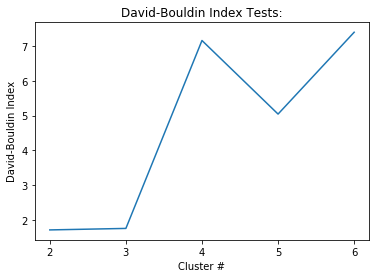

In [118]:
testDB(d,3,5)

In [116]:
a = kmean_e(d, 3)
m = db_matrix(d, a)
db_index(d, a)

6.520594299913704

In [117]:
m

array([[0.        , 1.87358234, 1.31099397],
       [1.87358234, 0.        , 8.84410028],
       [1.31099397, 8.84410028, 0.        ]])